# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Estimated average salmon catches by region 1878-1997'}, xlabel='Region', ylabel='Thousands of fish'>

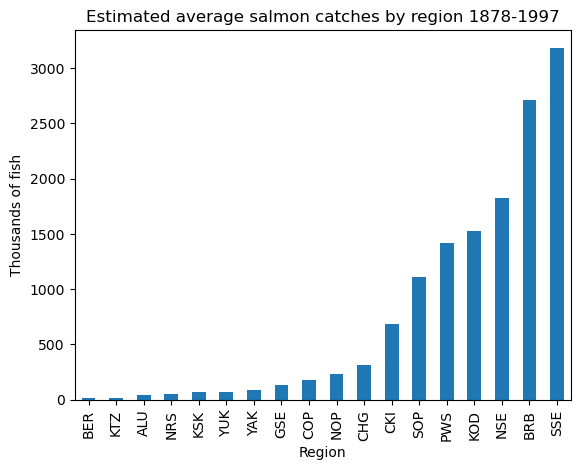

In [1]:
# FINAL CODE

import pandas as pd

# Read in data
catch_data = pd.read_csv('data/salmon_data.csv')

# Update problematic value, previously identified in exploratory analysis
catch_data.at[catch_data[catch_data.Catch == 'I'].index[0],'Catch'] = 1

# Convert column type to integers
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Calculate mean catch per region
mean_region = catch_data.groupby('Region').Catch.mean()

# Plot results
mean_region.sort_values().plot(kind='bar', 
                             title='Estimated average salmon catches by region 1878-1997',
                             ylabel='Thousands of fish')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data` and look at the head of the dataframe.

b. Use this code cell to make some other preliminary data exploration of your choosing.

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

In [2]:
# a.

import pandas as pd

catch_data = pd.read_csv('data/salmon_data.csv')
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


In [3]:
# b.

c.

## 2
In the next cell:
1. Print the unique values of the `notesRegCode` column. 
2. Update the dataframe so it doesn't include the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [4]:
print(catch_data.notesRegCode.unique())
catch_data = catch_data.drop(columns='notesRegCode')
catch_data.columns


[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [5]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

The Catch column should be numeric (int64) but is object type.

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [6]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output.

In [ ]:
catch_data[catch_data.Catch == 'I']

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed.

In [ ]:
catch_data.at[400, 'Catch'] = 1

# another option is
# catch_data.at[catch_data[catch_data.Catch == 'I'].index[0],'Catch'] = 1

print(catch_data.loc[400])

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type.

In [ ]:
catch_data.Catch = catch_data.Catch.astype('int64')
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
avg_region = catch_data.groupby('Region').Catch.mean()
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Estimated average salmon catches by region 1878-1997'}, xlabel='Region', ylabel='Thousands of fish'>

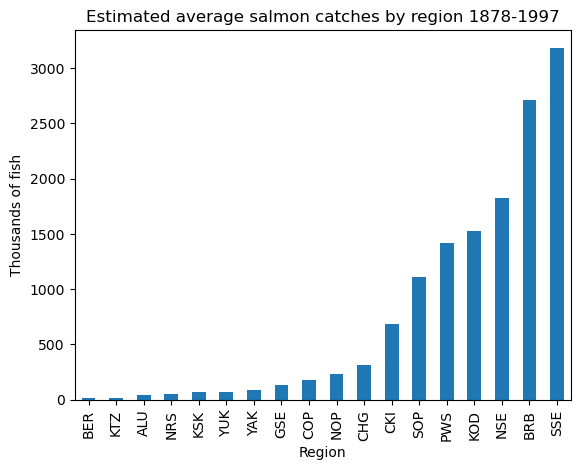

In [ ]:
avg_region.sort_values().plot(kind='bar', 
                             title='Estimated average salmon catches by region 1878-1997',
                             ylabel='Thousands of fish')

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).